<a href="https://colab.research.google.com/github/Parth-Rawri/Fruits-360/blob/main/Fruits_360_dataset_A_dataset_of_images_containing_fruits_and_vegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fruits 360

Multi-class, single-image classification challenge

#### Step 1: Downloading Fruits360 Dataset from Kaggle

* Number of classes: 131 (fruits and vegetables).
* Total number of Images: 90483
* Training set size: 67692 images (one fruit or vegetable per image)
* Test set size: 22688 images (one fruit or vegetable per image).
* Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)
* Image size: 100x100 pixels.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/moltean/fruits"
od.download(dataset_url)

  1%|▏         | 10.0M/760M [00:00<00:07, 102MB/s]

100%|██████████| 760M/760M [00:04<00:00, 184MB/s]


In [3]:
import os
# Looking into the directory

data_dir = "/content/fruits/fruits-360"
print(os.listdir(data_dir))

classes = os.listdir(data_dir + "/Training")
print(f"Classes: {classes} \n# Classes: {len(classes)}")

['test-multiple_fruits', 'Test', 'Training', 'readme.md', 'papers', 'LICENSE']
Classes: ['Kumquats', 'Physalis with Husk', 'Walnut', 'Apple Golden 2', 'Kaki', 'Tomato 3', 'Pear Stone', 'Cherry Wax Red', 'Ginger Root', 'Mango Red', 'Mandarine', 'Pear Forelle', 'Tomato 2', 'Nectarine', 'Apple Granny Smith', 'Corn', 'Tamarillo', 'Cantaloupe 1', 'Tomato 1', 'Mangostan', 'Melon Piel de Sapo', 'Onion Red', 'Grape Pink', 'Avocado ripe', 'Banana Red', 'Rambutan', 'Pear Red', 'Pineapple', 'Corn Husk', 'Cauliflower', 'Apple Red 1', 'Tangelo', 'Pepino', 'Grape White 4', 'Kohlrabi', 'Strawberry', 'Lemon', 'Onion White', 'Tomato not Ripened', 'Dates', 'Apple Red Yellow 1', 'Quince', 'Cactus fruit', 'Grape Blue', 'Apple Red 2', 'Cherry Wax Black', 'Strawberry Wedge', 'Eggplant', 'Mango', 'Cherry 1', 'Tomato Cherry Red', 'Beetroot', 'Tomato Maroon', 'Cocos', 'Peach Flat', 'Plum', 'Potato White', 'Lychee', 'Watermelon', 'Clementine', 'Passion Fruit', 'Apricot', 'Cherry Rainier', 'Huckleberry', 'Grape 

### Step 2: Applying Transformations to the Dataset

* Converting images into PyTorch tensors

In [4]:
import torch
import torchvision
import torchvision.transforms as transform
from torchvision.datasets import ImageFolder

train_transformations = transform.Compose([
                                           transform.ToTensor()
])

test_transformations = transform.Compose([
                                          transform.ToTensor()
])

Using `ImageFolder` class from `torchvision` to load the data as PyTorch tensors.

In [5]:
# PyTorch datasets
dataset = ImageFolder(data_dir + '/Training', train_transformations)
test_dataset = ImageFolder(data_dir + '/Test', test_transformations)

print(f"Training dataset size: {len(dataset)}") 
print(f"Test dataset size: {len(test_dataset)}")

Training dataset size: 67692
Test dataset size: 22688


The list of classes is stored in the `.classes` property of the dataset.

In [6]:
ds_classes = dataset.classes
print("Classes: ", ds_classes)

Classes:  ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracu

Analyzing the distribution of data in each subclasses.

In [7]:
train_Corn_Husk = os.listdir(data_dir + '/Training/Corn Husk')
print("No. of Training examples for Corn Husk: ", len(train_Corn_Husk))
print(train_Corn_Husk[:3]) 

No. of Training examples for Corn Husk:  462
['273_100.jpg', '241_100.jpg', 'r_82_100.jpg']


In [8]:
train_Grape_Pink = os.listdir(data_dir + '/Training/Grape Pink')
print("No. of Training examples for Corn Husk: ", len(train_Grape_Pink))
print(train_Grape_Pink[:3]) 

No. of Training examples for Corn Husk:  492
['273_100.jpg', '241_100.jpg', 'r_122_100.jpg']


In [9]:
train_Maracuja = os.listdir(data_dir + '/Training/Maracuja')
print("No. of Training examples for Corn Husk: ", len(train_Maracuja))
print(train_Maracuja[:3]) 

No. of Training examples for Corn Husk:  490
['273_100.jpg', '241_100.jpg', 'r_122_100.jpg']


In [10]:
test_Walnut = os.listdir(data_dir + '/Training/Walnut')
print("No. of Training examples for Corn Husk: ", len(test_Walnut))
print(test_Walnut[:3]) 

No. of Training examples for Corn Husk:  735
['r2_206_100.jpg', '273_100.jpg', 'r2_314_100.jpg']


Looking at a sample element from the training dataset. Each element is a tuple, containing a image tensor and a label.

In [11]:
for img, label in dataset:
    print(img.shape, label)
    print(img)
    break

torch.Size([3, 100, 100]) 0
tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.00

In [12]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

**Training and Validation Datasets**

Split the dataset into 3 parts (Test dataset is given):

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (6000 images) of the training set to be used as the validation set. We'll use the `random_split` helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.

In [13]:
random_seed = 34
torch.manual_seed(random_seed);

In [14]:
from torch.utils.data import random_split

val_size = 7692
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

print("Training dataset size:", len(train_ds))
print("Valuation dataset size:", len(val_ds))
print("Test dataset size:", len(test_dataset))

Training dataset size: 60000
Valuation dataset size: 7692
Test dataset size: 22688


We can view the image using `matplotlib`, but we need to change the tensor dimensions to `(bla,bleh,3)`. Let's create a helper function to display an image and its label.

In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [16]:
def show_image(img, label):
    print('Label: ', label)
    plt.imshow(img.permute(1, 2, 0))

Let's look at a couple of images from the dataset.

Label:  46


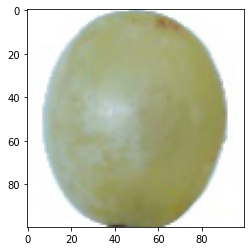

In [17]:
img, label = train_ds[45]
show_image(img, label)

Label:  33


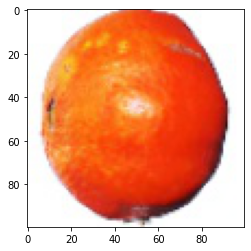

In [18]:
img, label = train_ds[445]
show_image(img, label)

Label:  93


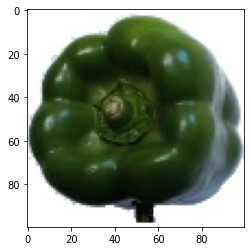

In [19]:
img, label = train_ds[4495]
show_image(img, label)

In [20]:
from torch.utils.data import DataLoader

batch_size = 256

# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [21]:
from torchvision.utils import make_grid

def show_batch(dl):
    
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(14, 14))
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


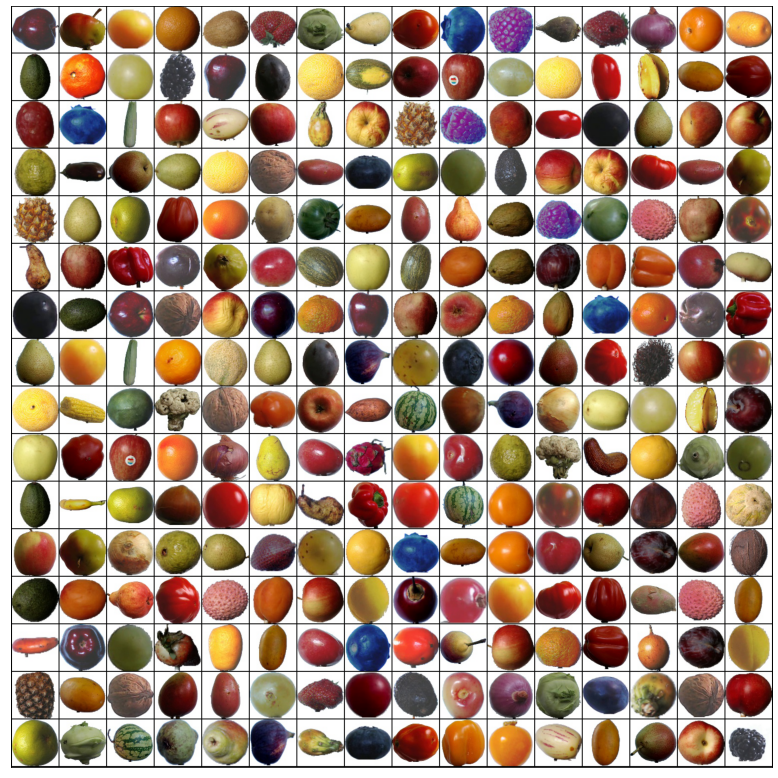

In [22]:
show_batch(train_dl)

### Using a GPU

GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks.

We can check if a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available`.

To seamlessly use a GPU, if one is available, we define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

> Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.

In [23]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

> Next, let's define a function that can move data and model to a chosen device.

In [24]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

> Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. <br> Interestingly, we don't need to extend an existing class to create a PyTorch datal loader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [25]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Based on where you're running this notebook, your default device could be a CPU (`torch.device('cpu')`) or a GPU (`torch.device('cuda')`)

In [26]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available).

In [27]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

### Model SexyNet

In [28]:
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

In [29]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch}], last_lr: {result['lrs'][-1]:.5f}, train_loss: {result['train_loss']:.4f}, val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

In [30]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1, stride=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: 
      layers.append(nn.MaxPool2d((2,2), 2))
    return nn.Sequential(*layers)
 

class SexyNet(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # I/P: 256 x 3 x 100 x 100
        
        self.conv1 = conv_block(in_channels, 64)       # 256 x 64 x 100 x 100                                 
        self.conv2 = conv_block(64, 128, pool=True)    # 256 x 128 x 50 x 50
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128)) # 256 x 128 x 50 x 50
        self.conv3 = conv_block(128, 512, pool=True)   # 256 x 512 x 25 x 25
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512)) # 256 x 512 x 25 x 25
        self.conv4 = nn.Conv2d(512, 512, kernel_size=3, padding=0, stride=2) # 256 x 512 x 12 x 12
        
        self.classifier = nn.Sequential(nn.MaxPool2d((4,4), 4),  # 256 x 512 x 3 x 3   
                                        nn.Flatten(),     # 256 x 4608
                                        nn.Dropout(0.2),  # 256 x 4608
                                        nn.Linear(4608, num_classes))  # 256 x 4608 x 131
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.res2(out) + out
        out = self.conv4(out)
        out = self.classifier(out)
        return out

In [31]:
model = to_device(SexyNet(3, 131), device)
model

SexyNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpla

### Training the Model

In [32]:
@torch.no_grad()
def evaluate(model, val_dl):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_dl]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, weight_decay=0, grad_clip=None, opt_func=torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_dl))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_dl:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_dl)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [33]:
history = [evaluate(model, val_dl)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.007938507944345474, 'val_loss': 4.875598907470703}]

In [34]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [35]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], last_lr: 0.00394, train_loss: 1.3786, val_loss: 66.6336, val_acc: 0.4052
Epoch [1], last_lr: 0.00935, train_loss: 2.8154, val_loss: 12.6708, val_acc: 0.7910
Epoch [2], last_lr: 0.00972, train_loss: 0.3706, val_loss: 0.0498, val_acc: 0.9942
Epoch [3], last_lr: 0.00812, train_loss: 0.6962, val_loss: 4.9422, val_acc: 0.8664
Epoch [4], last_lr: 0.00556, train_loss: 0.1938, val_loss: 0.1162, val_acc: 0.9911
Epoch [5], last_lr: 0.00283, train_loss: 0.0183, val_loss: 0.0000, val_acc: 1.0000
Epoch [6], last_lr: 0.00077, train_loss: 0.0009, val_loss: 0.0000, val_acc: 1.0000
Epoch [7], last_lr: 0.00000, train_loss: 0.0012, val_loss: 0.0000, val_acc: 1.0000
CPU times: user 35min 5s, sys: 41min 52s, total: 1h 16min 58s
Wall time: 1h 16min 57s


In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

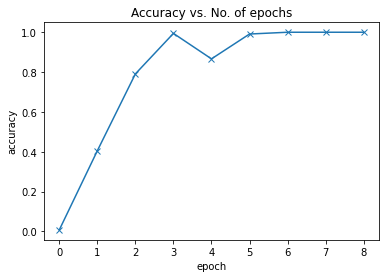

In [37]:
plot_accuracies(history)

In [38]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

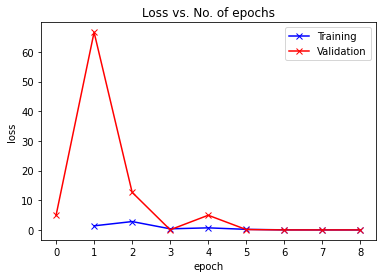

In [39]:
plot_losses(history)

In [40]:
test_acc = evaluate(model, test_dl)
test_acc

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.9877545833587646, 'val_loss': 0.37923482060432434}